# Mnist Digit Classification


1.   The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.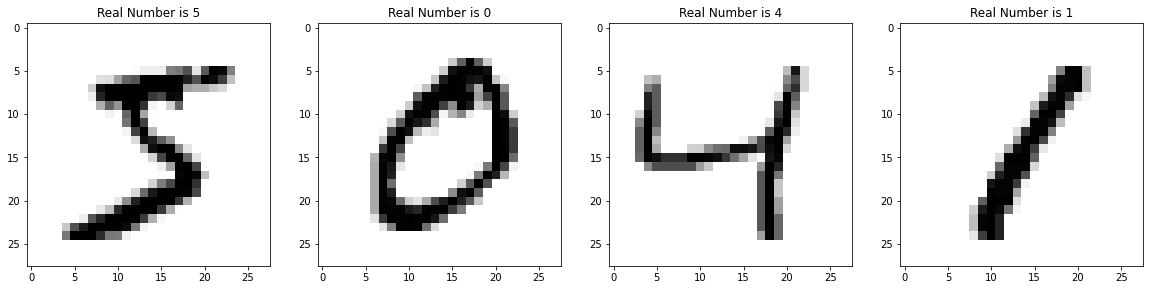



# IMPORTING LIBRARIES

In [1]:
# import necessary library
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
# LOAD DATASET OF MINST DIGIT DATASET
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


# DATA VISUALIZATION

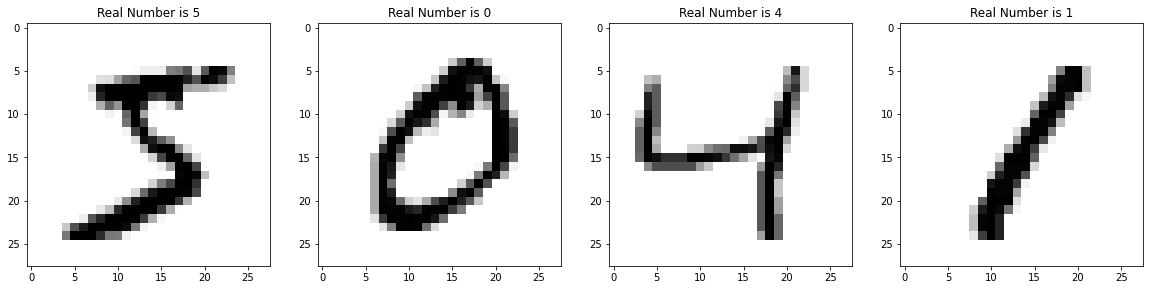

In [3]:
# DATA VISUALIZATION
X_train = x_train.reshape(x_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train[i], cmap='binary')
    digit = y_train[i]
    ax.set(title = f"Real Number is {digit}");

In [4]:
# Shape of Image
x_train[0].shape

(28, 28)

# CNN Architecture
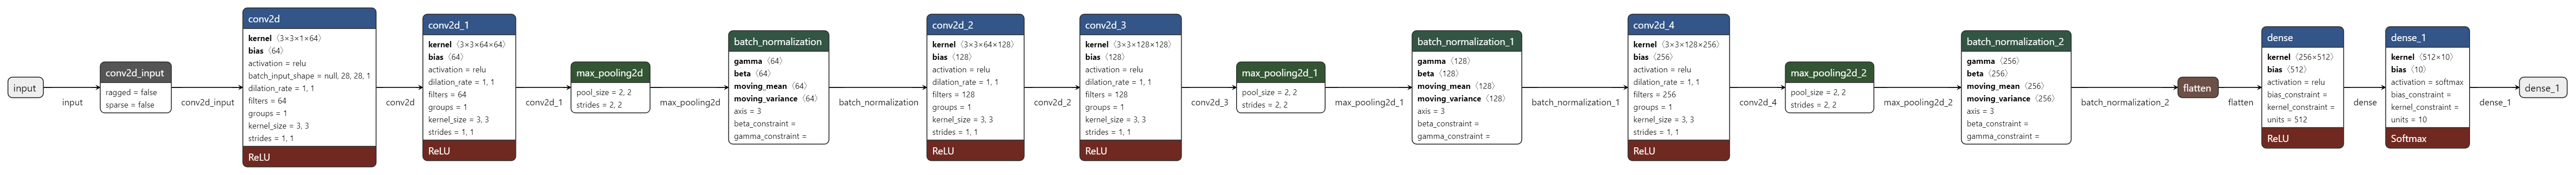

In [5]:
# BUILD CNN MODEL

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64,
                                 kernel_size = (3,3),activation = "relu",
                                  input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters = 64,
                                 kernel_size = (3,3),activation = "relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters = 128,
                                 kernel_size = (3,3),activation = "relu",
                                  ))
model.add(tf.keras.layers.Conv2D(filters = 128,
                                 kernel_size = (3,3),activation = "relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters = 256,
                                 kernel_size = (3,3),activation = "relu",
                                  ))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [9]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, batch_size=32, validation_split=0.2,
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience = 10),
          epochs=50)

Epoch 1/50
1500/1500 [==============================] - 20s 6ms/step - loss: 0.1015 - accuracy: 0.9692 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 2/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0328 - val_accuracy: 0.9912
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.0502 - val_accuracy: 0.9873
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0430 - val_accuracy: 0.9898
Epoch 6/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0407 - val_accuracy: 0.9899
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0394 - val_accuracy

In [12]:
tf.keras.models.save_model(model,"digit_classification.h5")